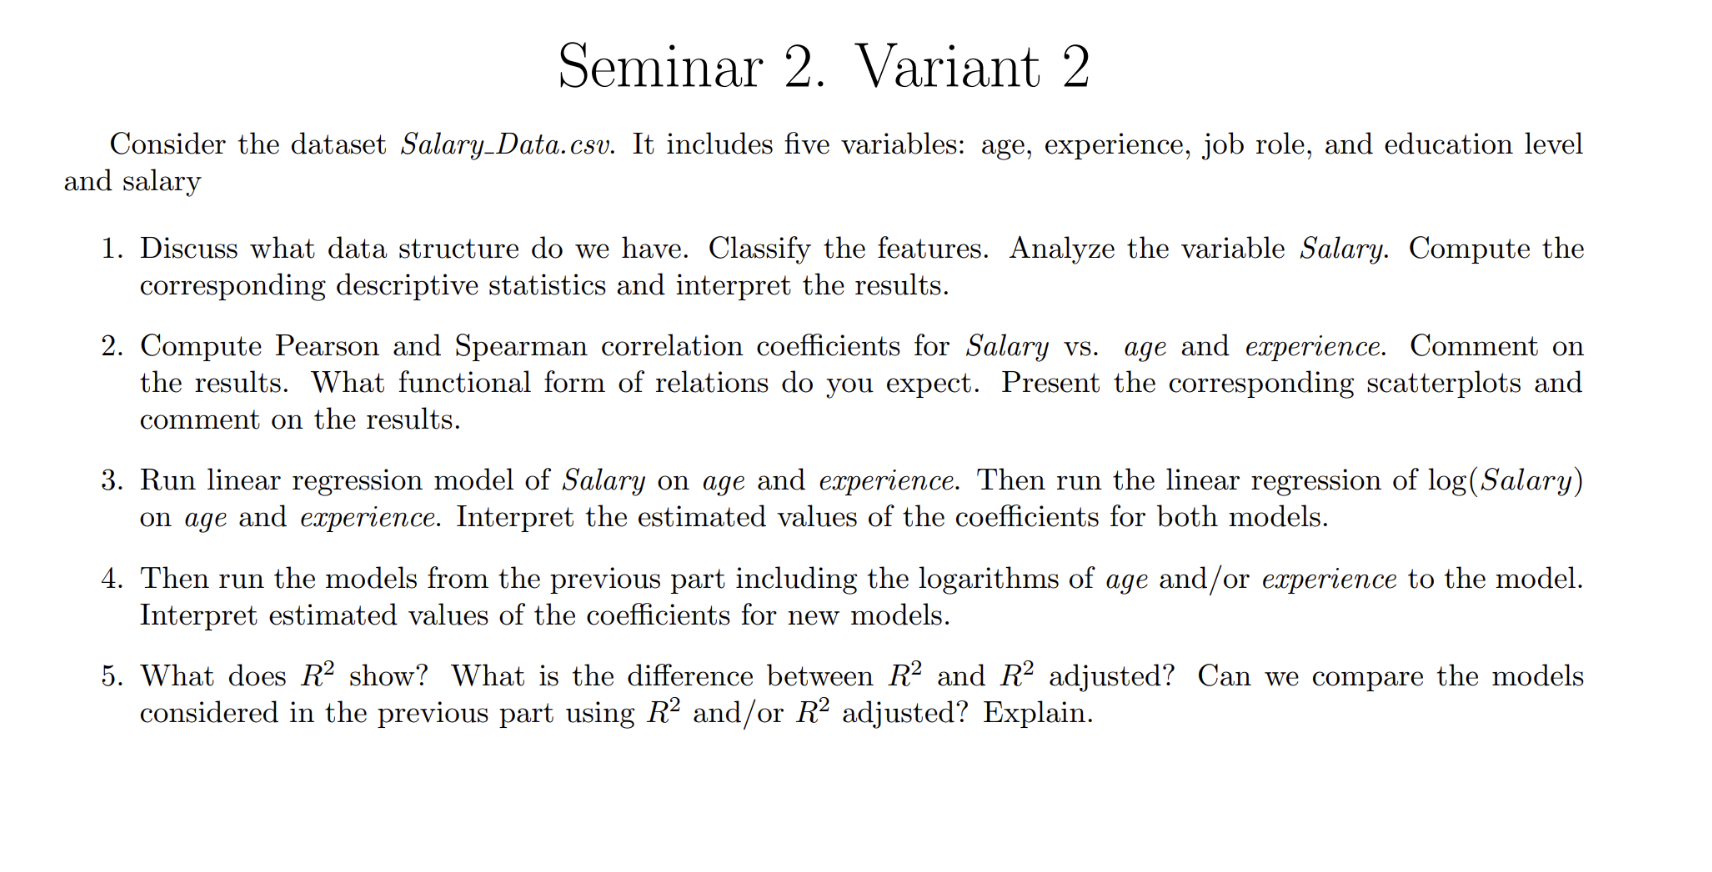

### <h3 style="color: green;">1. Discuss what data structure do we have. Classify the features. Analyze the variable Salary. Compute the corresponding descriptive statistics and interpret the results.</h3>

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [233]:
salary_data = pd.read_csv('Salary_Data 1.csv')
salary_data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


Here we have cross-sectional data structure, because it's tied with point in time.

1. Variable Classification

| Variable                                | Data Scale | Classification | Explanation |
|-----------------------------------------|------------|---------------|-------------|
| **age (in years)**                      | ratio      | quantitative  | The age is measured in years. If the age is zero, it means no age in year (small baby). This variable has zero measurement, indicating a lack of the characteristic. It is quantitative because its realizations reflect both differences and magnitudes. |
| **Gender**                    | nominal    | qualitative   | A categorical variable indicating a person's gender. It does not allow for meaningful numerical comparisons beyond equality or inequality. It is qualitative, as it describes a personal attribute — gender.  |
| **Education level** | ordinal      | qualitative  | It is ordinanl, bacause we can range our data such Bachelor's, Master's etc.|
| **Job title** | nominal  |qualitative   | A categorical variable indicating a person's job title. It does not allow for meaningful numerical comparisons beyond equality or inequality. It is qualitative, as it describes a personal attribute — job title.  |
| **Years of Experience** | ratio      | quantitative  | This variable has a true zero, representing a complete lack of experience. It is quantitative since its realizations reflect both differences and magnitudes.  |
| **Salary** | ratio      | quantitative  | This variable has a true zero, meaning that person doesn't earn any money. It is quantitative since its realizations reflect both differences and magnitudes. |

In [257]:
salary_data = salary_data.dropna()
salary_feature = salary_data['Salary']

In [258]:
location_measures= {"Mean": int(round(float(salary_feature.mean()), 0)),
                     "Median": int(round(float(salary_feature.median()), 0)),
                     "Lower quartile": int(round(float(salary_feature.quantile(0.25)), 0)),
                     "Upper quartile": int(round(float(salary_feature.quantile(0.75)), 0)),
                     "Lower quantile (5%)": int(round(float(salary_feature.quantile(0.05)), 0)),
                     "Upper quantile (5%)": int(round(float(salary_feature.quantile(0.95)), 0))
                     }

df = pd.DataFrame(list(location_measures.items()), columns=["Measure", "Value"])

df.style

,Measure,Value
0,Mean,115329
1,Median,115000
2,Lower quartile,70000
3,Upper quartile,160000
4,Lower quantile (5%),35000
5,Upper quantile (5%),195000


- The mean salary represents the average salary earned by individuals in the dataset. It is not very representative, because it's sensitive to outliers (extreme values), meaning that if there are very high wages, they can push the mean upwards. In this case, the mean salary is 115 329, which not really higher than what most people actually earn.

- The median salary (50%-quantile) is the middle value in the dataset, meaning 50% of individuals earn less than this amount and 50% earn more. The median is 115 000, there no big differerence between mean and median. Meaning that both the mean and median give a good representation of the "typical" salary in this dataset.

- The lower quartile (25th percentile) is 70 000, meaning that 25% of workers earn less than this amount. Similarly, the upper quartile (75th percentile) is 160 000, meaning that 75% of individuals earn below this amount. These quartiles help describe the spread of salaries.

- The 5th percentile (Lower 5%-Quantile) is 35 000, indicating that 5% of workers earn below this amount. This represents the lowest-paid individuals in the dataset. The 95th percentile (Upper 5%-Quantile) is 195 000, meaning 5% of individuals earn above this salary, representing the highest-paid individuals, , who earn significantly more than the median.

In [236]:
measures_of_variation = {
    "Measure": ["Range", "Interquartile Range", "Variance"],
    "Value": [
        round(float(salary_feature.max() - salary_feature.min()), 2),
        round(float(location_measures["Upper quartile"] - location_measures["Lower quartile"]), 2),
        round(float(salary_feature.var()), 2)
    ]
}

variation_table = pd.DataFrame(measures_of_variation)
variation_table.style

,Measure,Value
0,Range,249650.000000
1,Interquartile Range,90000.000000
2,Variance,2786762192.930000


- Range: 249,650 → The range is the difference between the highest and lowest wage. A large range indicates a big difference, meaning that some workers earn significantly more than others.
- Interquartile Range is a difference between third and first quartile. A large IQR suggests considerable variation in salaries, even within typical values.
- A very high variance(2786762192), indicating a strong spread in salary values, meaning that salaries differ significantly from the mean.

### <h3 style="color: purple;">2. Compute Pearson and Spearman correlation coefficients for Salary vs. age and experience. Comment on the results. What functional form of relations do you expect. Present the corresponding scatterplots and comment on the results.</h3>

In [237]:
pearson_corr = salary_data[['Salary', 'Age', 'Years of Experience']].corr(method='pearson').round(2).iloc[:1]
spearman_corr = salary_data[['Salary', 'Age', 'Years of Experience']].corr(method='spearman').round(2).iloc[:1]

correlation_table = pd.concat([pearson_corr, spearman_corr], keys=['Pearson', 'Spearman'])
correlation_table

,,Salary,Age,Years of Experience
Pearson,Salary,1.0,0.73,0.81
Spearman,Salary,1.0,0.75,0.86


**Pearson Correlation:**
Salary vs Age: 0.73

It indicates strong positive correlation. This suggests that as age increases, salary tends to increase.

Salary vs Years of Experience: 0.81

It indicated strong positive correlation. This implies that more experience generally leads to a higher salary.


**Spearman Correlation (Monotonic Relationship):**

Salary vs age: 0.75

Slightly stronger than Pearson, indicating that the ranking order of age and salary is well maintained.

Salary vs experience: 0.86

Stronger than Pearson, meaning that the increase in experience consistently correlates with a higher salary.

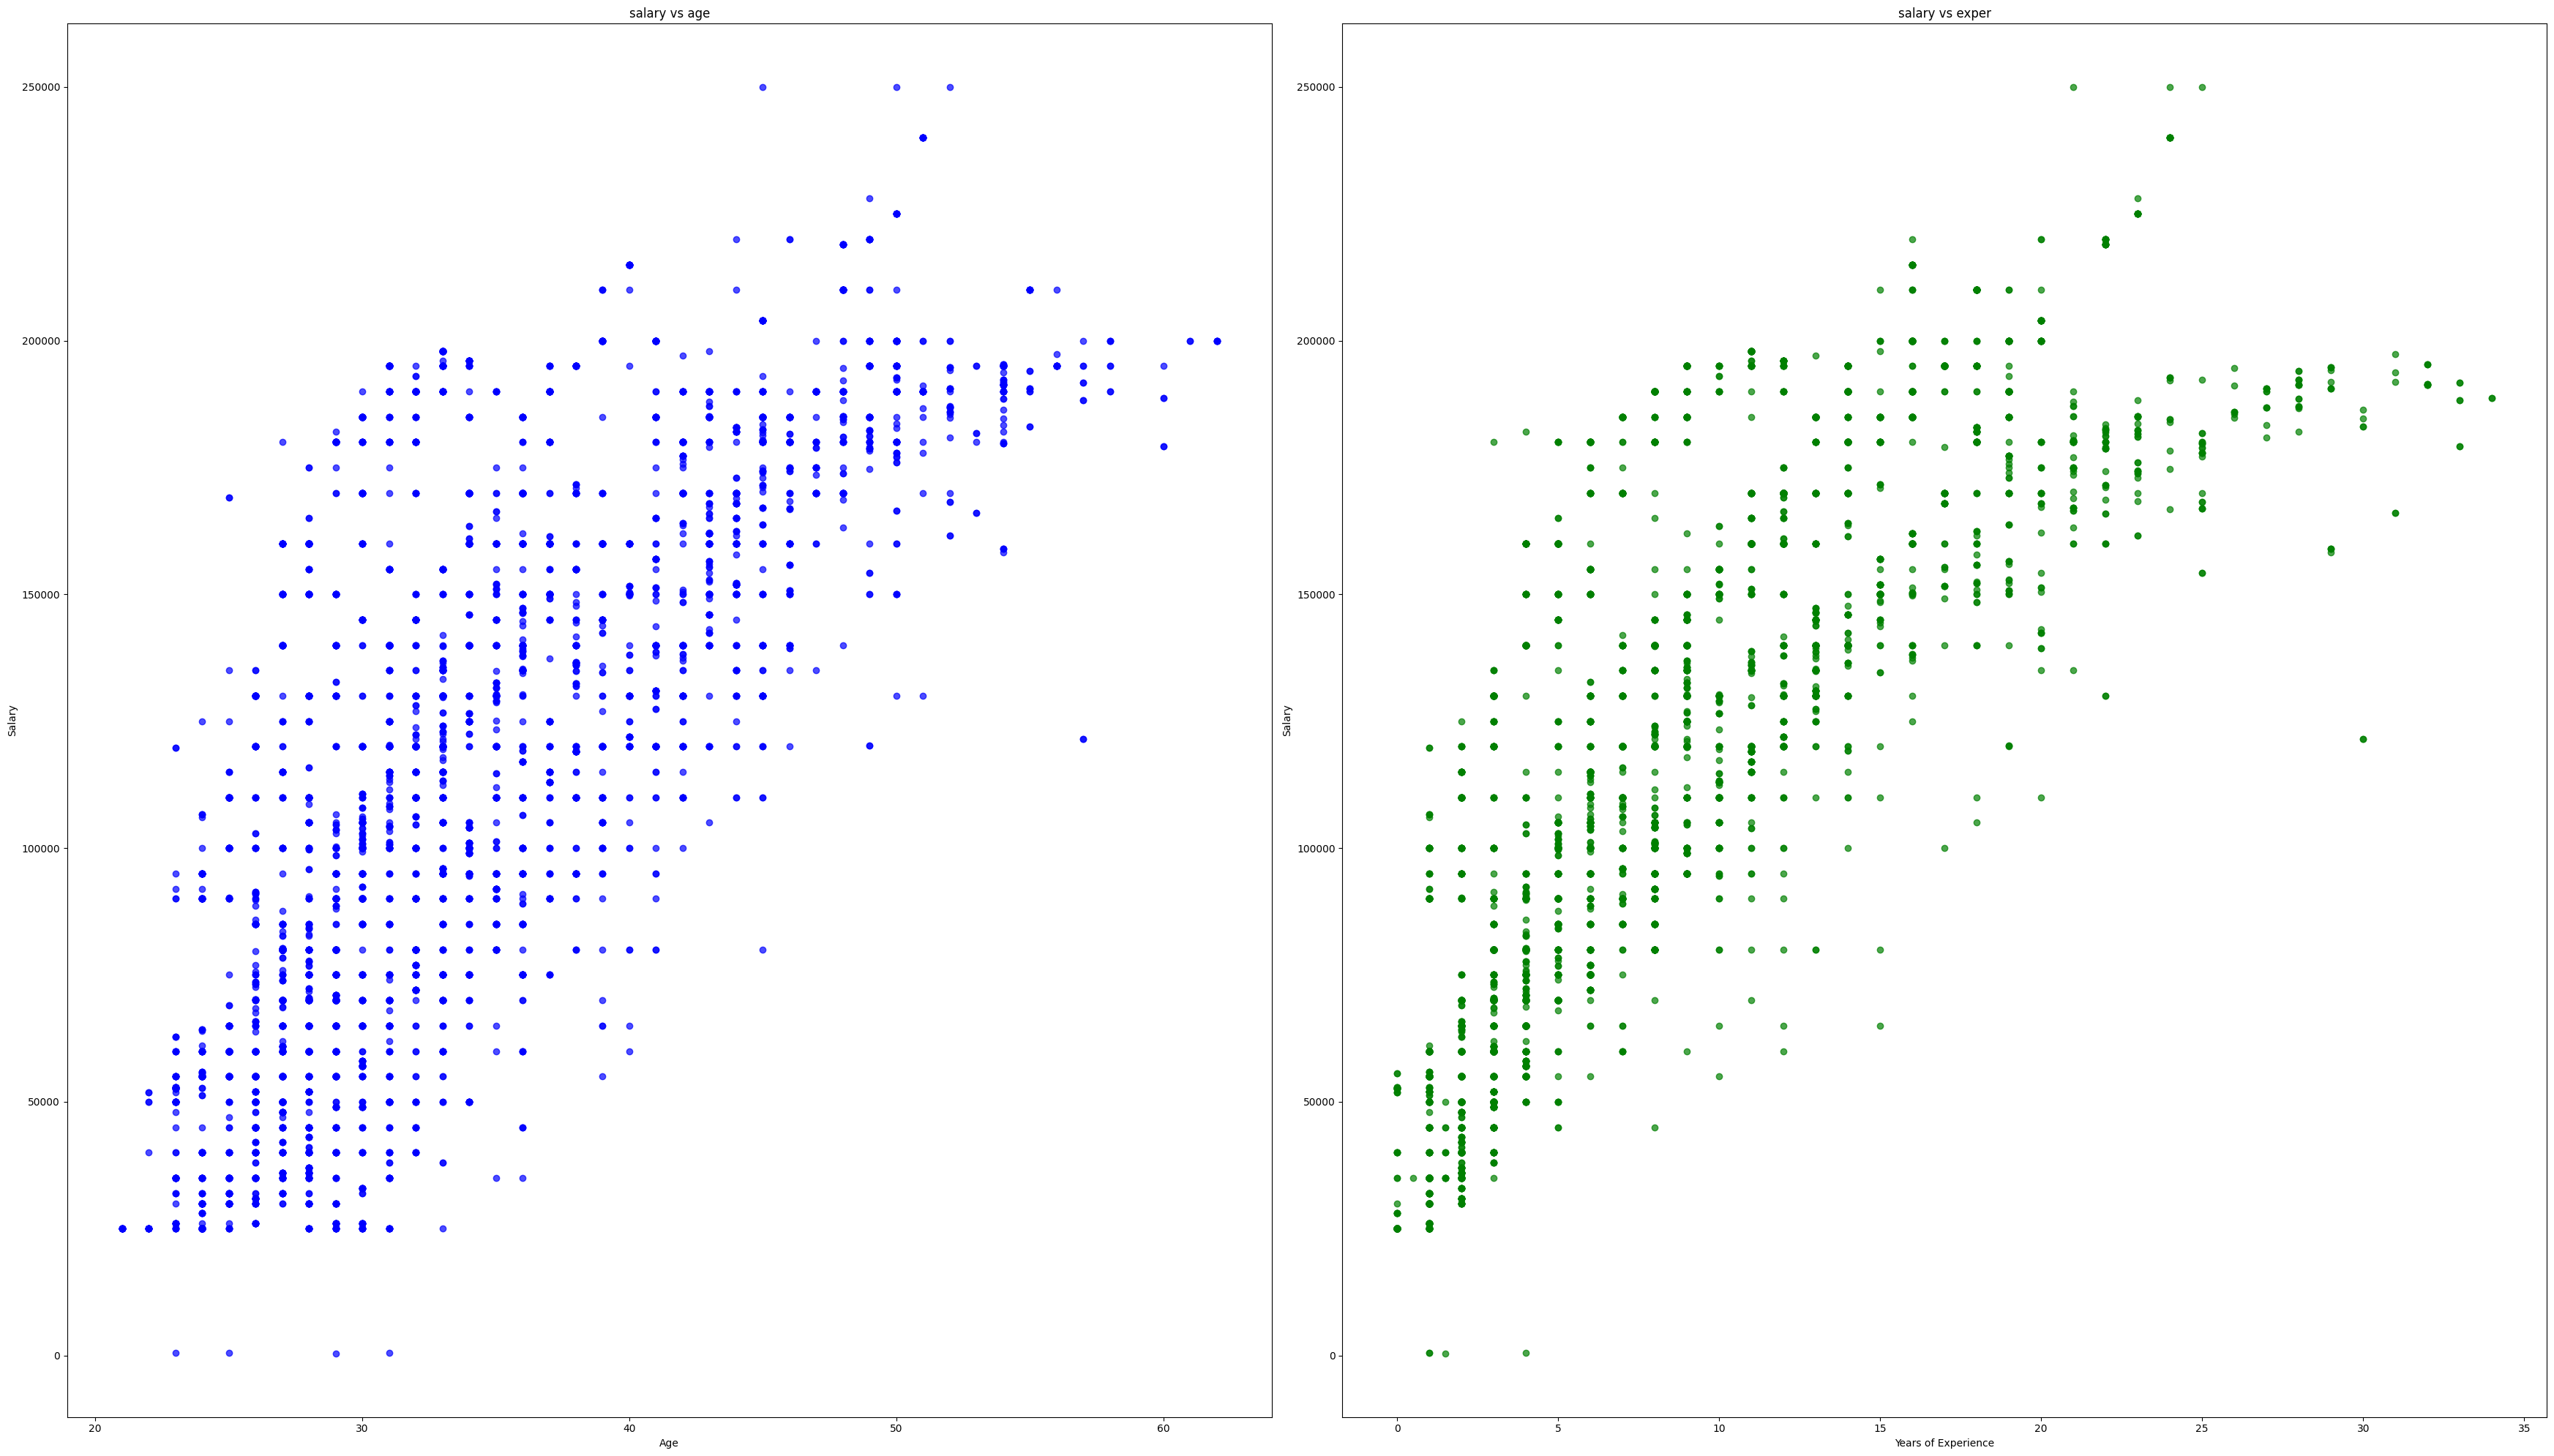

In [238]:
fig, axs = plt.subplots(1, 2, figsize=(35, 20))

axs[0].scatter(salary_data['Age'], salary_data['Salary'], color='blue', alpha=0.7)
axs[0].set_title('salary vs age')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Salary')

axs[1].scatter(salary_data['Years of Experience'], salary_data['Salary'], color='green', alpha=0.7)
axs[1].set_title('salary vs exper')
axs[1].set_xlabel('Years of Experience')
axs[1].set_ylabel('Salary')

plt.tight_layout()
plt.show()

### <h3 style="color: orange;"> 3. Run linear regression model of Salary on age and experience. Then run the linear regression of log(Salary) on age and experience. Interpret the estimated values of the coeﬃcients for both models.</h3>

In [239]:
x1 = salary_data[['Age']]
y = salary_data['Salary']

model1 = LinearRegression()
model1.fit(x1, y)

y1_pred = model1.predict(x1)

print("The coefficients:", model.coef_)
print("The intercept:", model.intercept_)

The coefficients: [5046.64636526]
The intercept: -54354.247682993664


In [240]:
x2 = salary_data[['Years of Experience']]
model2 = LinearRegression()
model2.fit(x2, y)
y2_pred = model2.predict(x2)

print("The coefficients:", model2.coef_)
print("The intercept:", model2.intercept_)


The coefficients: [7046.73445655]
The intercept: 58284.685676957444


The coefficients tell us that for a single-unit increase of the independent variable (Age, Years of Experience), the dependent variable (salary) will increase by the value of the coefficients on average. For example, for every additional year of age, the salary will approximately increase by $\$5047$, and for each year of experience by $\$7046$.

In [241]:
log_model2 = LinearRegression()
log_model2.fit(x2, log_y)

print("The coefficients:", log_model2.coef_)
print("The intercept:", log_model2.intercept_)

The coefficients: [0.06983314]
The intercept: 10.956878693932591


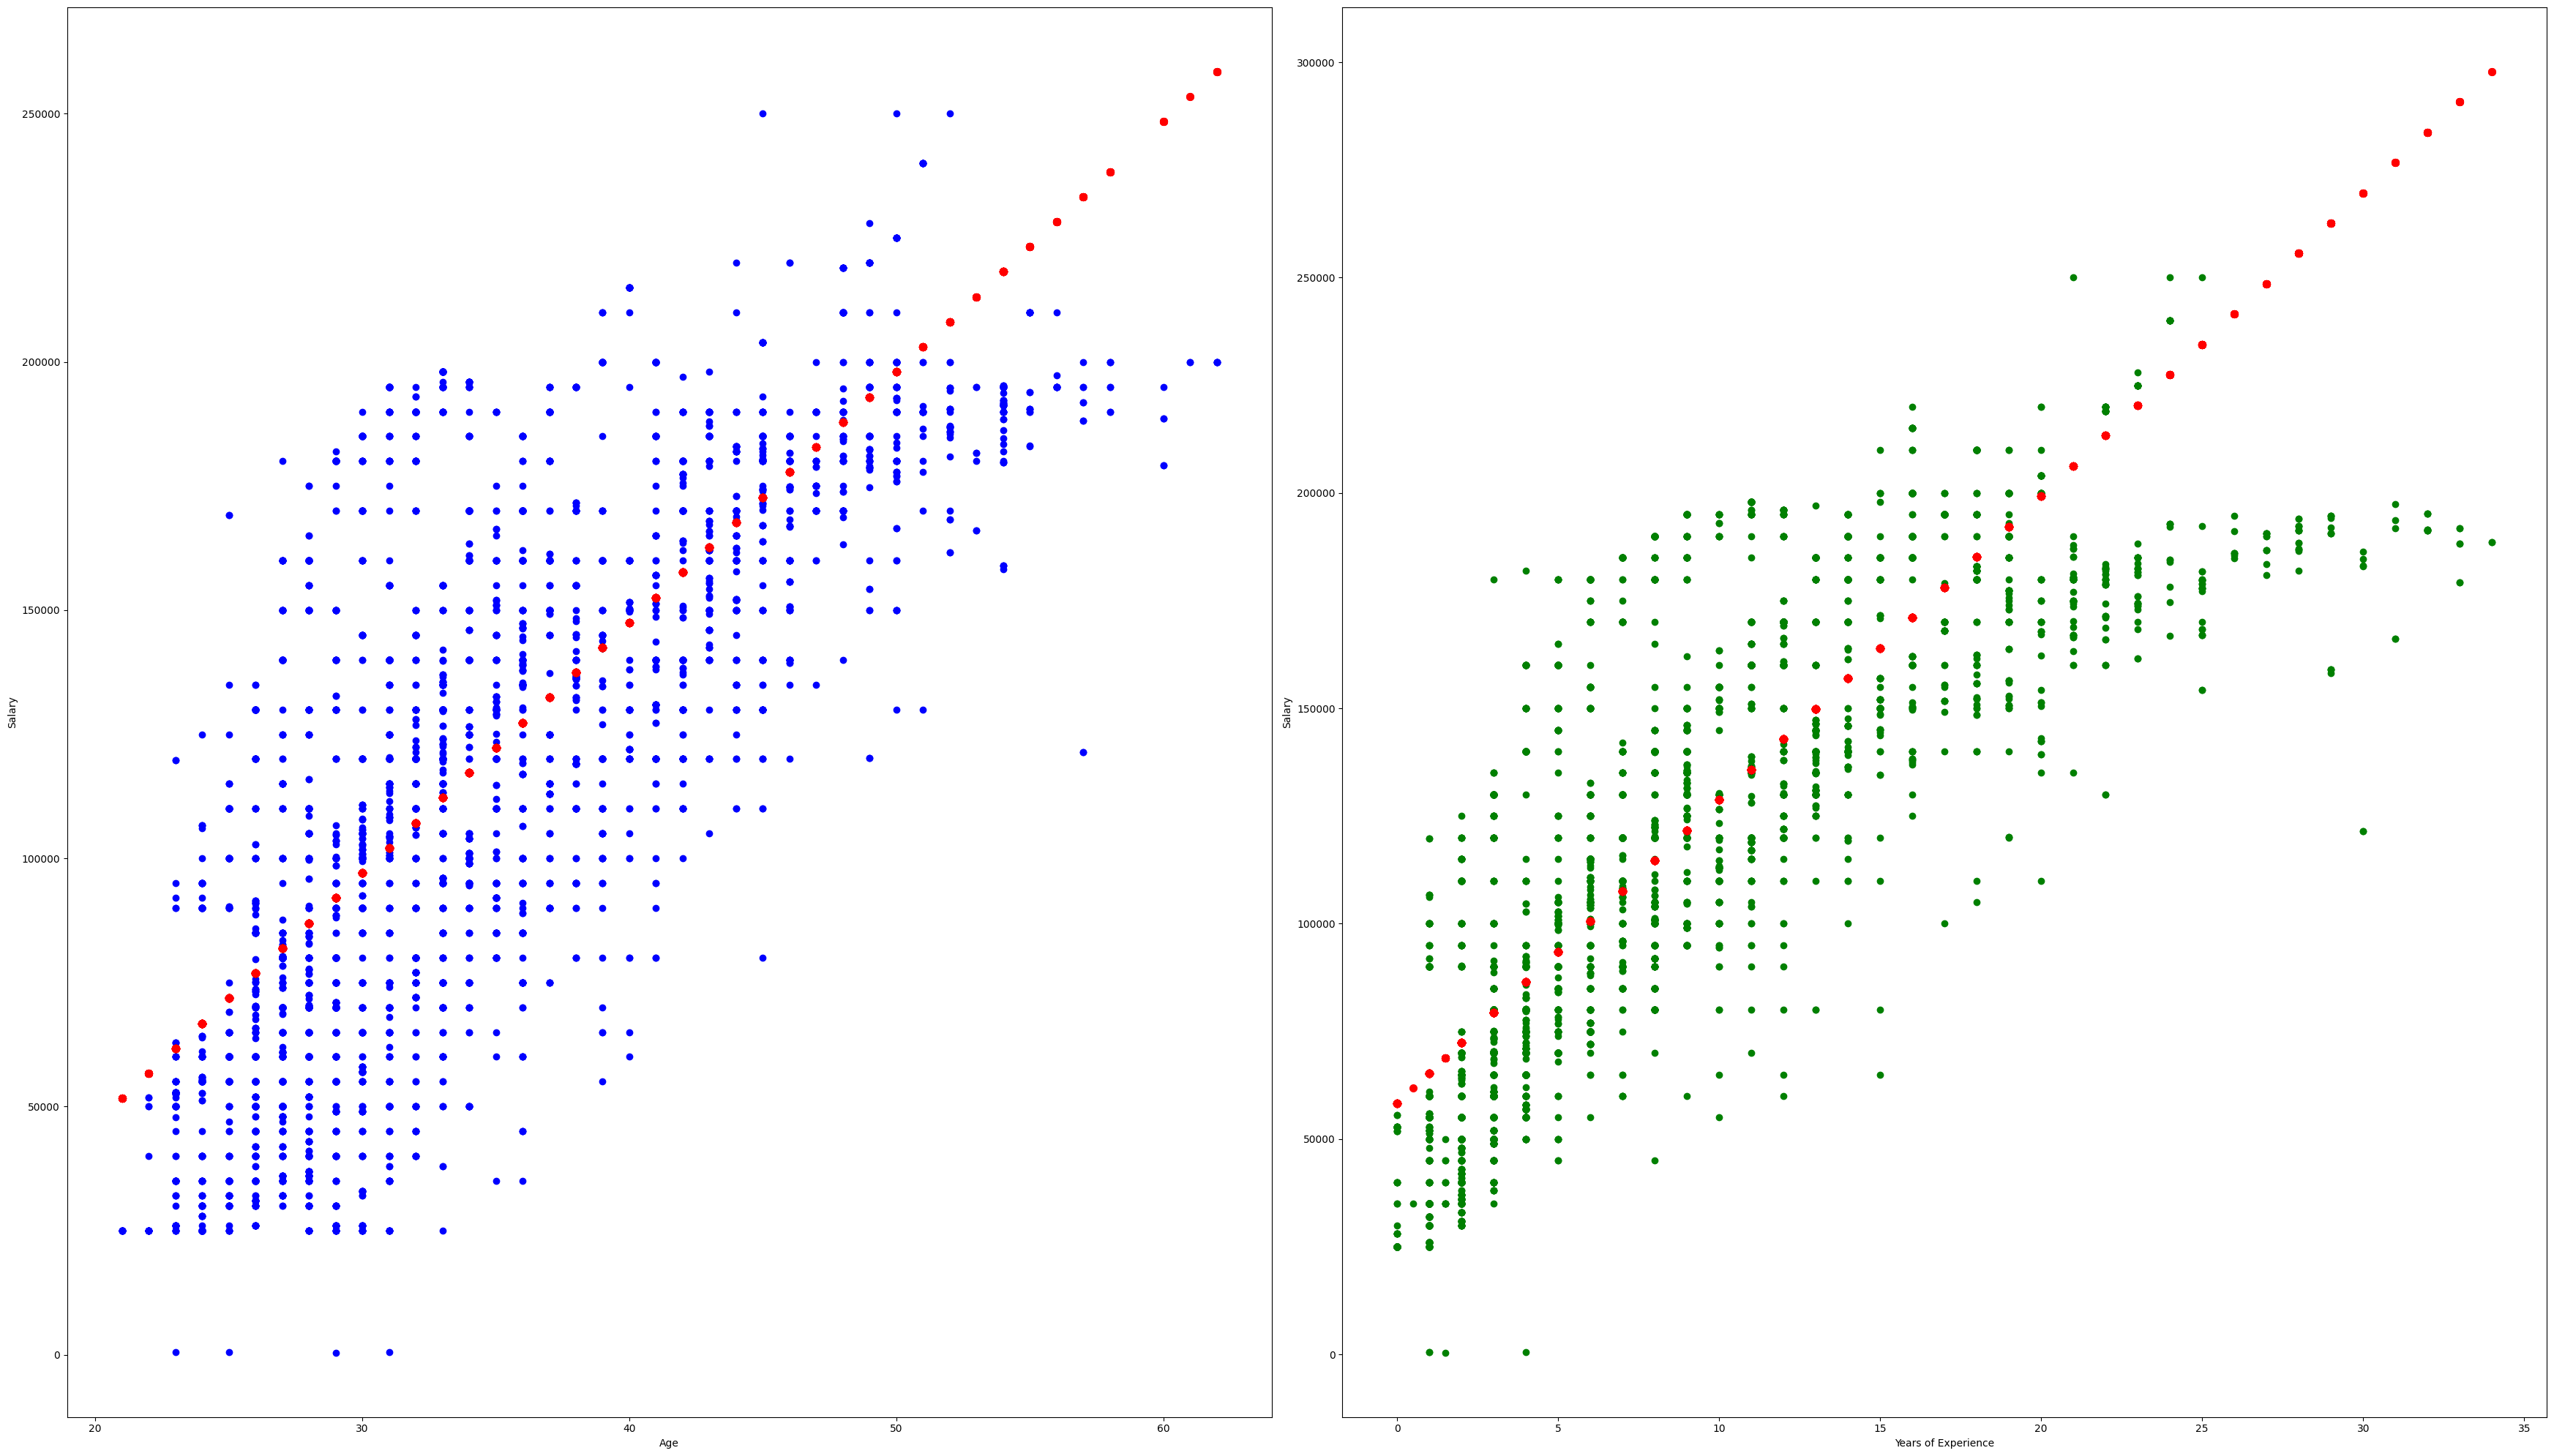

In [242]:
fig, axs = plt.subplots(1, 2, figsize=(35, 20))
axs[0].scatter(x1, y, color='blue', label='Actual Data')
axs[0].scatter(x1, y1_pred, color='red', linewidth=2, label='Regression Line')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Salary')

axs[1].scatter(x2, y, color='green', label='Actual Data')
axs[1].scatter(x2, y2_pred, color='red', linewidth=2, label='Regression Line')
axs[1].set_xlabel('Years of Experience')
axs[1].set_ylabel('Salary')

plt.tight_layout()
plt.show()

In [243]:
log_y = np.log(y)

log_model = LinearRegression()
log_model.fit(x1, log_y)

print("The coefficients:", log_model.coef_)
print("The intercept:", log_model.intercept_)

The coefficients: [0.04963887]
The intercept: 9.853181479726803


Applying the $\log$ transformation to the dependent variable (Salary) helps us deal with skewed data, which can influence the regression, by decreasing the influence of outliers. The coefficients can be interpreted as a percentage of increase in Salary using the formula:
$(e^{\texttt{coefficient}} - 1) \cdot 100$

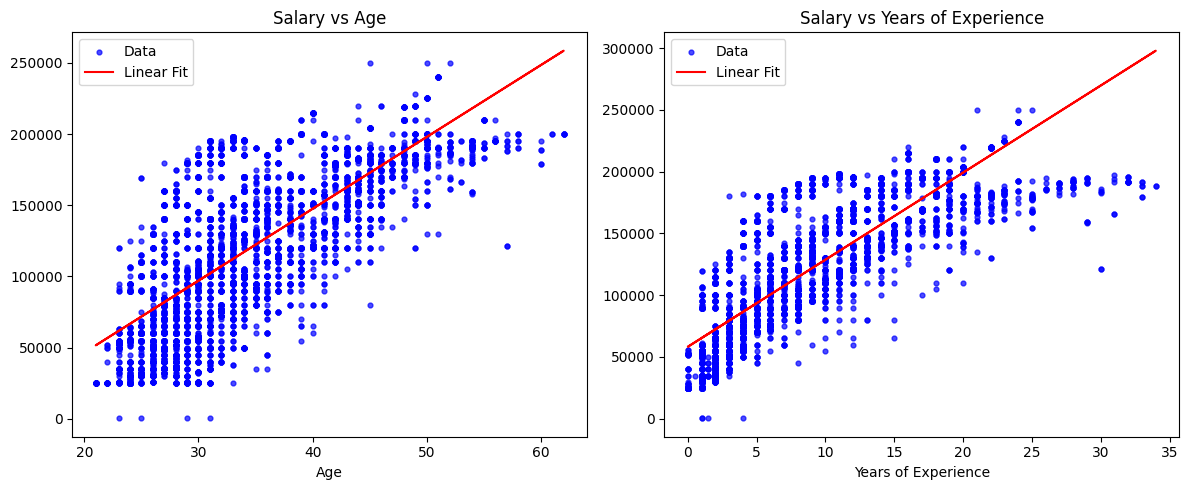

In [244]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(salary_data[['Age']], salary_data[['Salary']], color='blue', label='Data', s=12, alpha=0.7)
axes[0].plot(salary_data[['Age']], model1.predict(salary_data[['Age']]), color='red', label='Linear Fit')
axes[0].set_xlabel('Age')
axes[0].legend()
axes[0].set_title("Salary vs Age")

axes[1].scatter(salary_data[['Years of Experience']], salary_data[['Salary']], color='blue', label='Data', s=12, alpha=0.7)
axes[1].plot(salary_data[['Years of Experience']], model2.predict(salary_data[['Years of Experience']]), color='red', label='Linear Fit')
axes[1].set_xlabel('Years of Experience')
axes[1].legend()
axes[1].set_title("Salary vs Years of Experience")

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Log of Salary vs Years of Experience')

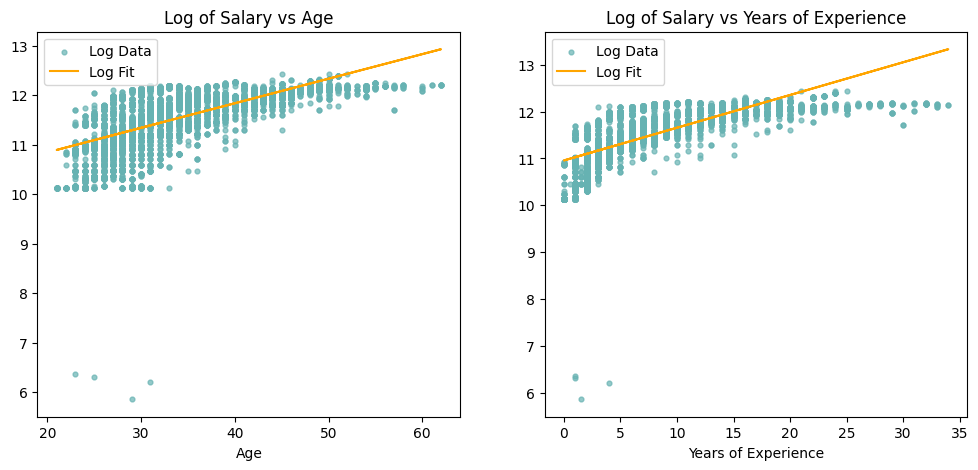

In [245]:
fig, axes_log = plt.subplots(1, 2, figsize=(12, 5))

axes_log[0].scatter(salary_data[['Age']], np.log(salary_data[['Salary']]), color='#66B2B2', label='Log Data', s=12, alpha=0.7)
axes_log[0].plot(salary_data[['Age']], log_model.predict(salary_data[['Age']]), color='orange', label='Log Fit')
axes_log[0].set_xlabel('Age')
axes_log[0].legend()
axes_log[0].set_title("Log of Salary vs Age")

axes_log[1].scatter(salary_data[['Years of Experience']], np.log(salary_data[['Salary']]), color='#66B2B2', label='Log Data', s=12, alpha=0.7)
axes_log[1].plot(salary_data[['Years of Experience']], log_model2.predict(salary_data[['Years of Experience']]), color='orange', label='Log Fit')
axes_log[1].set_xlabel('Years of Experience')
axes_log[1].legend()
axes_log[1].set_title("Log of Salary vs Years of Experience")

In [246]:
X = salary_data[['Age', 'Years of Experience']] #independent variables
y = salary_data['Salary'] #dependent variable

model3 = LinearRegression()
model3.fit(X, y)

print("The coefficients:", model3.coef_)
print("The intercept:", model3.intercept_)

The coefficients: [-1753.67229227  9113.28116863]
The intercept: 100519.38459857486


In [247]:
y_log = np.log(y)

log_model3 = LinearRegression()
log_model3.fit(X, y_log)

print("The coefficients:", log_model3.coef_)
print("The intercept:", log_model3.intercept_)

The coefficients: [-0.02047319  0.09395897]
The intercept: 11.449946381543072


### <h3 style="color: blue;">4. Then run the models from the previous part including the logarithms of age and/or experience to the model. Interpret estimated values of the coefficients for new models.</h3>

In [248]:
log_age = np.log(salary_data[['Age']].replace(0, 1))
log_experience = np.log(salary_data[['Years of Experience']].replace(0, 1))

In [249]:
log_age_model = LinearRegression()
log_age_model.fit(log_age, y)

print("The coefficients:", log_age_model.coef_)
print("The intercept:", log_age_model.intercept_)

The coefficients: [182880.05759004]
The intercept: -523187.4639448416


In [250]:
log_experience_model = LinearRegression()
log_experience_model.fit(log_experience, y)

print("The coefficients:", log_experience_model.coef_)
print("The intercept:", log_experience_model.intercept_)

The coefficients: [49912.61812778]
The intercept: 27471.37617157516


In [251]:
log_age_experience_model = LinearRegression()
log_age_experience_model.fit(pd.concat([log_age, log_experience], axis=1), y)

print("The coefficients:", log_age_experience_model.coef_)
print("The intercept:", log_age_experience_model.intercept_)

The coefficients: [-15619.00961378  53275.43319302]
The intercept: 76085.03853716298


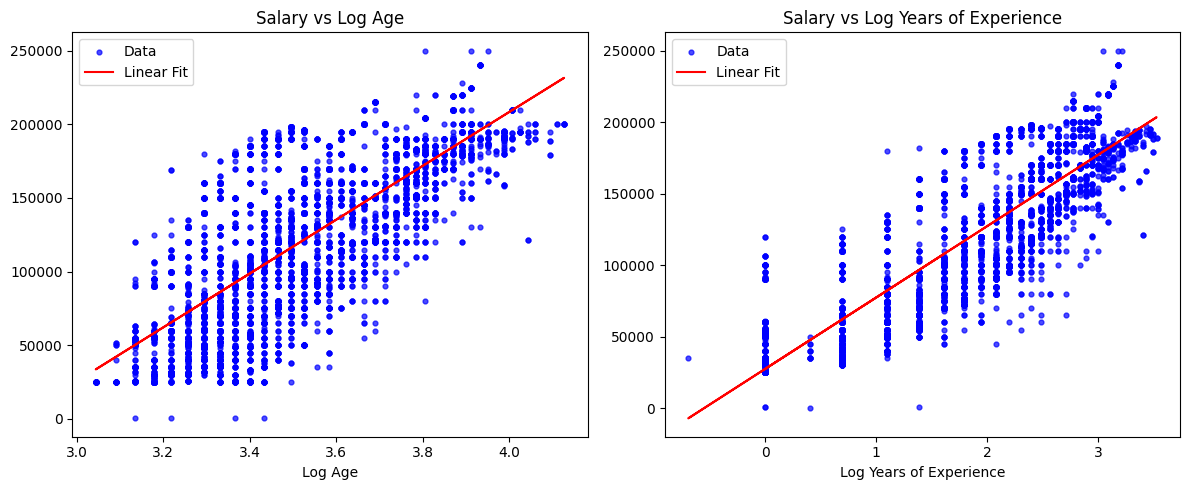

In [252]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(log_age, y, color='blue', label='Data', s=12, alpha=0.7)
axes[0].plot(log_age, log_age_model.predict(log_age), color='red', label='Linear Fit')
axes[0].set_xlabel('Log Age')
axes[0].legend()
axes[0].set_title("Salary vs Log Age")

axes[1].scatter(log_experience, y, color='blue', label='Data', s=12, alpha=0.7)
axes[1].plot(log_experience, log_experience_model.predict(log_experience), color='red', label='Linear Fit')
axes[1].set_xlabel('Log Years of Experience')
axes[1].legend()
axes[1].set_title("Salary vs Log Years of Experience")

plt.tight_layout()
plt.show()

For $\log(x)$ and $y$, the interpretation of $\beta_1$ is as follows: $\Delta y = \left(\frac{\beta_1}{100}\right) \% \Delta x$. According to these plots and the coefficients of linear regression models, we can see that at:
1. Log Age - with an increase in age by $1\%$, the salary increases by about $\$1828$.
2. Log Years of Experience - with an increase in age by $1\%$, the salary increases by about $\$499$.
3. Log Age and Years of Experience - with an increase in age by $1\%$ (while the years of experience do not change), the salary decreases by $\$156$; with an increase in years of experience by $1\%$ (while the age does not change), the salary increases by $\$532$.

In [253]:
log_age_log_salary = LinearRegression()
log_age_log_salary.fit(log_age, y_log)

print("The coefficients:", log_age_log_salary.coef_)
print("The intercept:", log_age_log_salary.intercept_)

The coefficients: [1.83358793]
The intercept: 5.1203083664061


In [254]:
log_experience_log_salary = LinearRegression()
log_experience_log_salary.fit(log_experience, y_log)

print("The coefficients:", log_experience_log_salary.coef_)
print("The intercept:", log_experience_log_salary.intercept_)

The coefficients: [0.53578465]
The intercept: 10.579084110955968


In [255]:
log_age_experience_log_salary = LinearRegression()
log_age_experience_log_salary.fit(pd.concat([log_age, log_experience], axis=1), y_log)

print("The coefficients:", log_age_experience_log_salary.coef_)
print("The intercept:", log_age_experience_log_salary.intercept_)

The coefficients: [-0.82250173  0.7128715 ]
The intercept: 13.139094143809784


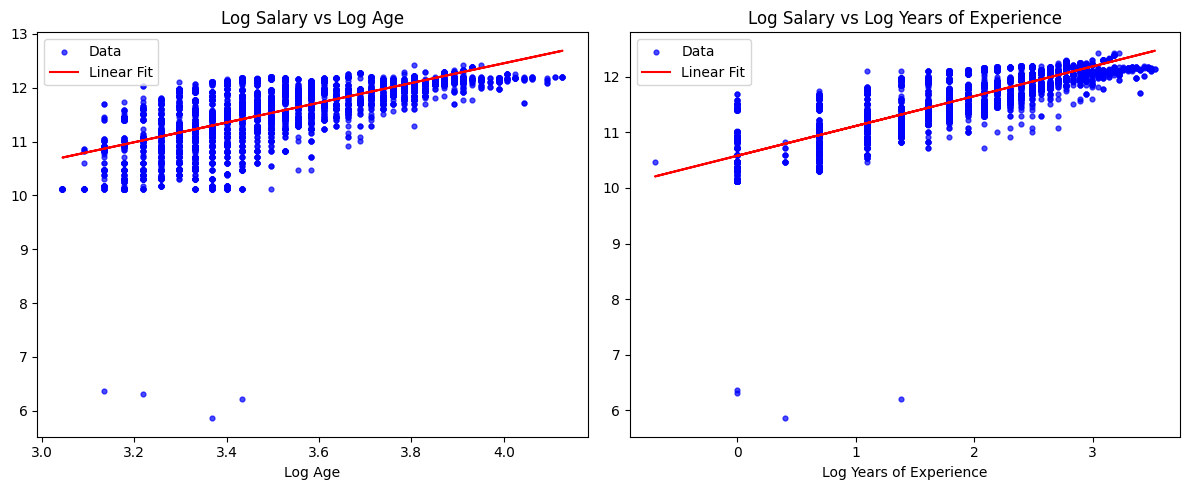

In [256]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(log_age, y_log, color='blue', label='Data', s=12, alpha=0.7)
axes[0].plot(log_age, log_age_log_salary.predict(log_age), color='red', label='Linear Fit')
axes[0].set_xlabel('Log Age')
axes[0].legend()
axes[0].set_title("Log Salary vs Log Age")

axes[1].scatter(log_experience, y_log, color='blue', label='Data', s=12, alpha=0.7)
axes[1].plot(log_experience, log_experience_log_salary.predict(log_experience), color='red', label='Linear Fit')
axes[1].set_xlabel('Log Years of Experience')
axes[1].legend()
axes[1].set_title("Log Salary vs Log Years of Experience")

plt.tight_layout()
plt.show()

For $\log(x)$ and $\log(y)$, the interpretation of $\beta_1$ is as follows: $\% \Delta y = \beta_1 \% \Delta x$. According to these plots and the coefficients of linear regression models, we can see that at:

1. Log Age - with an increase in age by $1\%$, the salary increases by about $1.8\%$.
2. Log Years of Experience - with an increase in age by $1\%$, the salary increases by about $0.5\%$.
3. Log Age and Years of Experience - with an increase in age by $1\%$ (while the years of experience do not change), the salary decreases by $0.8\%$; with an increase in years of experience by $1\%$ (while the age does not change), the salary increases by $0.7\%$.

### 5. What does $R^2$ show? What is the difference between $R^2$ and $R^2$ adjusted? Can we compare the models considered in the previous part using $R^2$ and/or $R^2$ adjusted? Explain.

The coefficient of determination(R²) is a number between 0 and 1 that measures how well a statistical model predicts an outcome.
- R² = 1 means the model perfectly predicts the outcome.
- R² = 0 means the model does not predict the outcome.
the observations are close to the model’s predictions.
#### Difference between R² and Adjusted R²
- **R²:** Increases when more independent variables are added, even if they are not relevant.

  $R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}$

  where:
  - $y_i$ are the actual values,
  - $\hat{y}_i$ are the predicted values,
  - $\bar{y}$ is the mean of the actual values.


- **Adjusted R²:**  Takes into account the number of independent variables in the model. Increases if the new variable significantly improves the model. It is calculated as:

  $R^2_{adj} = 1 - (1 - R^2) \times \frac{n - 1}{n - k - 1}$

  where:
  - $n$ is the number of observations
  - $k$ is the number of predictors

Adjusted R² is more reliable when comparing models with different numbers of predictors.

- If the models have the same dependent variable (Salary in both models), then R² can be directly compared.
A higher R² indicates a better fit, meaning the model explains more of the variance in salary.
- If the dependent variable is transformed (log(Salary) instead of Salary), direct comparison of R² values is not valid because they measure the proportion of variance explained on different scales.